# Méthodologie d'Analyse des Données Quantitatives dans le Jeu de Données 

## Introduction :

  &emsp;Dans cette étude on va présenter la méthodologie qu'on a utilisé pour analyser les données quantitatives dans un travail d'analyse exploratoire des données (EDA) sur le jeu de données sur les prix immobiliers de Californie. Dans cette analyse, on a utilisé une approche systématique pour découvrir des informations et des schémas au sein de ce jeu de données. on va vous guider à travers chaque étape, en fournissant des exemples et en illustrant le travail à mesure que nous progressons.

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = fetch_california_housing(as_frame=True)
data = data.frame
data = data[0:500]
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df = data.copy(deep=True)
μ = pd.Series({col: 0 for col in data.columns}, dtype="float32")
σ = pd.Series({col: 0 for col in data.columns}, dtype="float32")

for col in data.columns:
    μ[col] = data[col].mean()
    σ[col] = data[col].std()
    df[col] = (data[col] - μ[col]) / σ[col]

### Étape 1 : Analyse des Variables Simples

&emsp;Dans la phase initiale de notre analyse, nous avons effectué une analyse des variables simples. Voici ce que nous avons fait :

#### 1.1 Statistiques Sommaires et Tests de Normalité :
&emsp;Le calcule des statistiques sommaires telles que la moyenne, la médiane, max, min, et l'écart type. en plus, des tests de normalité comme Kurtosis, Skewness pour comprendre la distribution.

In [5]:
from scipy.stats import skew, kurtosis
import pandas_flavor as pf



skimmed_data = data.describe().transpose()


skimmed_data['Skewness'] = data.apply(lambda x: skew(x))
skimmed_data['Kurtosis'] = data.apply(lambda x: kurtosis(x))


from scipy.stats import jarque_bera
skimmed_data['Jarque_Bera'] = data.apply(lambda x: jarque_bera(x)[0])

skimmed_data = skimmed_data.reset_index().rename(columns={'index': 'Variable'})


numeric_cols = skimmed_data.select_dtypes(include=[float]).columns
skimmed_data[numeric_cols] = skimmed_data[numeric_cols].round(3)

skimmed_data


,Variable,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Jarque_Bera
0,MedInc,500.0,3.264,1.830,0.500,2.020,2.723,3.929,11.602,1.314,1.543,193.438
1,HouseAge,500.0,44.566,9.116,2.000,40.000,48.000,52.000,52.000,-1.468,2.076,269.465
2,AveRooms,500.0,4.987,1.238,1.714,4.206,4.799,5.728,8.973,0.468,0.142,18.653
3,AveBedrms,500.0,1.066,0.101,0.571,1.012,1.060,1.105,1.753,1.374,9.962,2225.001
4,Population,500.0,962.554,563.772,18.000,581.250,861.500,1178.500,4985.000,2.137,9.016,2073.856
5,AveOccup,500.0,2.704,0.887,1.437,2.223,2.559,3.005,12.234,4.941,42.769,40142.130
6,Latitude,500.0,37.813,0.045,37.730,37.780,37.810,37.850,37.900,0.185,-0.939,21.221
7,Longitude,500.0,-122.233,0.044,-122.340,-122.270,-122.240,-122.190,-122.120,0.328,-0.912,26.287
8,MedHouseVal,500.0,1.904,0.986,0.600,1.102,1.590,2.546,5.000,0.928,0.082,71.851


#### 1.2 Boîtes à Moustaches :

&emsp;Les boîtes à moustaches ont été employées pour mettre en évidence les valeurs aberrantes et les variations importantes dans les prix des logements. Elles offrent une vue synthétique des données, mettant en évidence les quartiles et les données extrêmes et offre une visualisation de la table du sommaire statistique.

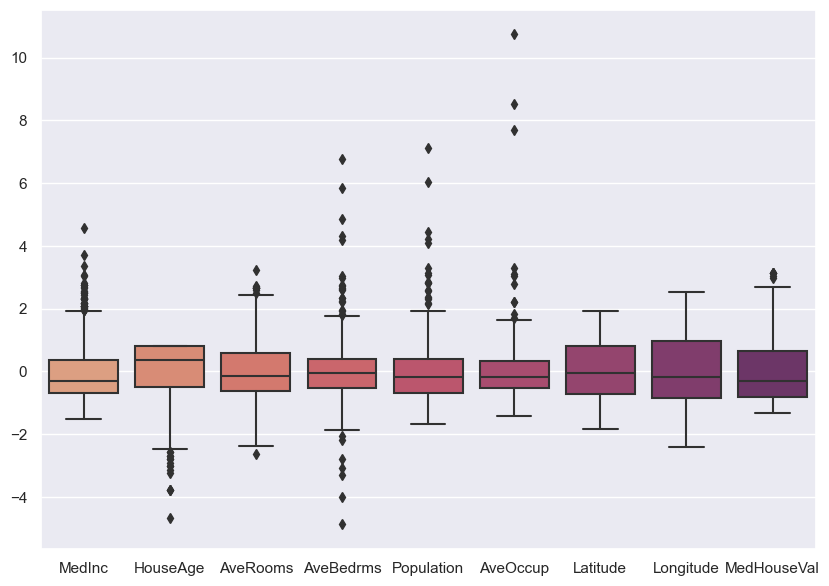

In [44]:
custom_palette = sns.color_palette("flare", 10)

plt.figure(figsize=(10, 7))
sns.boxplot(data=df, palette=custom_palette)

plt.subplots_adjust(hspace=0.7, wspace=0.4)

plt.show()

#### 1.3 Visualisation des Histogrammes :

Visualisation des histogrammes pour représenter graphiquement et comprendre la distribution de chaque variable.

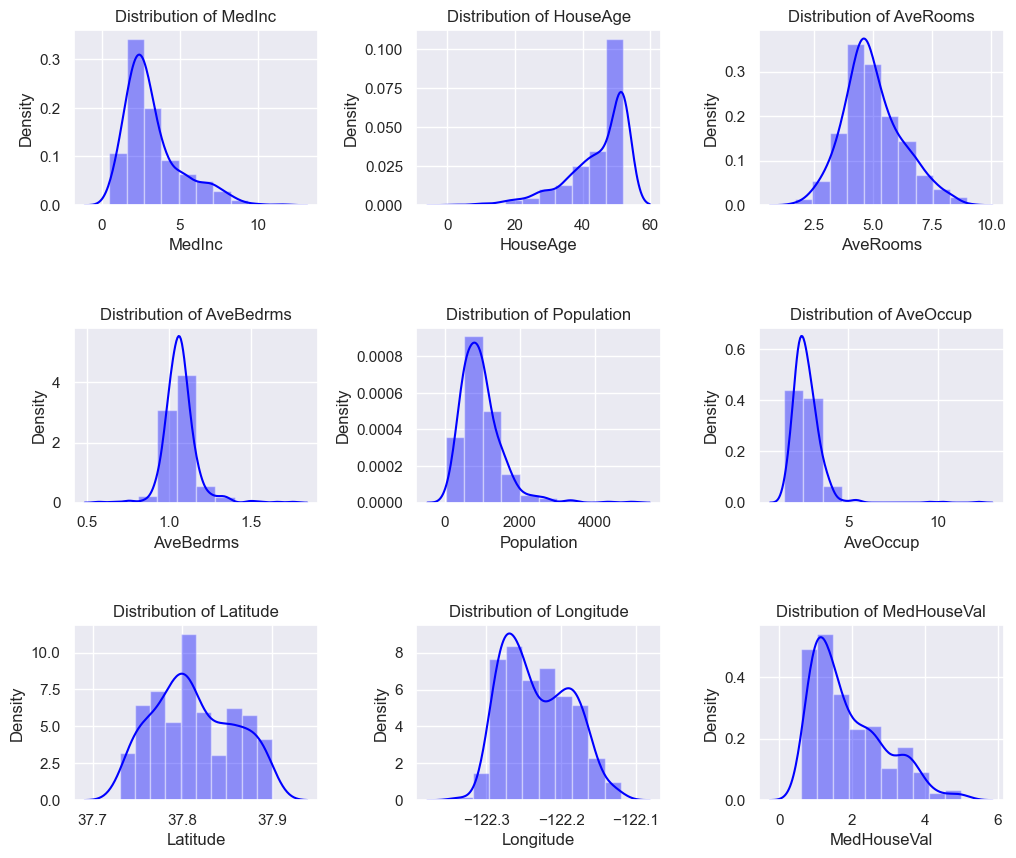

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))


for i, column in enumerate(data.columns):
    row, col = divmod(i, 3)  
    ax = axes[row, col]      
    sns.distplot(data[column], bins=10, ax=ax, color='blue', kde=True)
    ax.set_title(f'Distribution of {column}')  


plt.subplots_adjust(hspace=0.7, wspace=0.4)


plt.show()

On a discrétisé en groupes la variable, ce qui nous a permis de regrouper des individus par tranches d'âge. Ensuite, on a créé un graphique à barres pour illustrer la distribution des maisons dans chaque tranche d'âge.

In [65]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create a new column with the age bins
data['age_bins'] = pd.cut(data['HouseAge'], bins=bin_edges, labels=bin_labels)

# Group by the age bins and count the number of houses in each bin
age_grouped = data['age_bins'].value_counts().reset_index()
age_grouped.columns = ['Age Group', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(age_grouped, x='Age Group', y='Count', title='House Age Distribution')
fig.update_layout(width=800, height=600)

fig.show()

### Étape 2 : Analyse Multivariée
&emsp;&emsp;Dans la deuxième étape, on a exploré les relations entre différentes variables ie analyse bivariée pour identifier les corrélations et les tendances. Voici ce qu'on a fait :

### &emsp;2.1 Calcul de la Corrélation :

&emsp;&emsp;&emsp;Le calcul des coefficients de corrélation nous permet de mesurer la force et la direction des relations entre les variables. Une corrélation positive indique une augmentation conjointe, tandis qu'une corrélation négative indique une variation inverse.

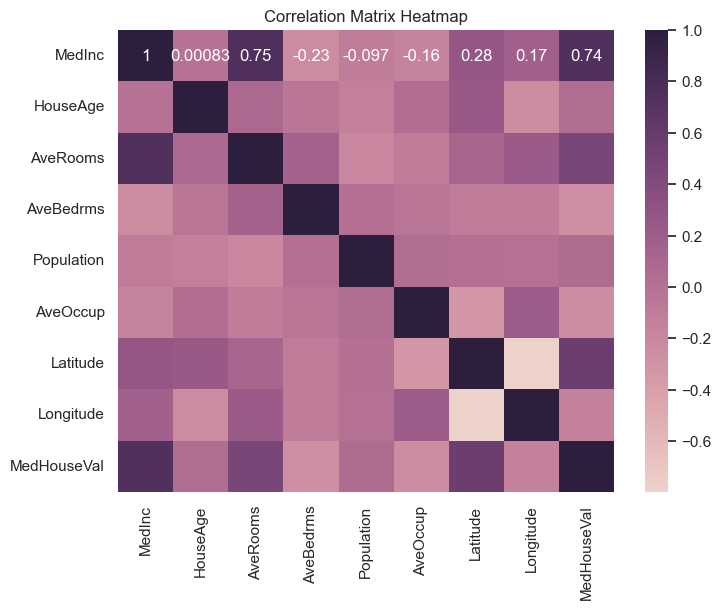

In [84]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation Matrix Heatmap");

### 2.2 Nuages de Points (Scatter Plots) :

&emsp;Les nuages de points sont des graphiques bidimensionnels qui représentent la relation entre deux variables. Ils nous aident à visualiser les tendances, les schémas et les valeurs atypiques dans les données. L'utilisation du "pair plot" permet d'observer les interactions entre différentes variables en un seul graphique.

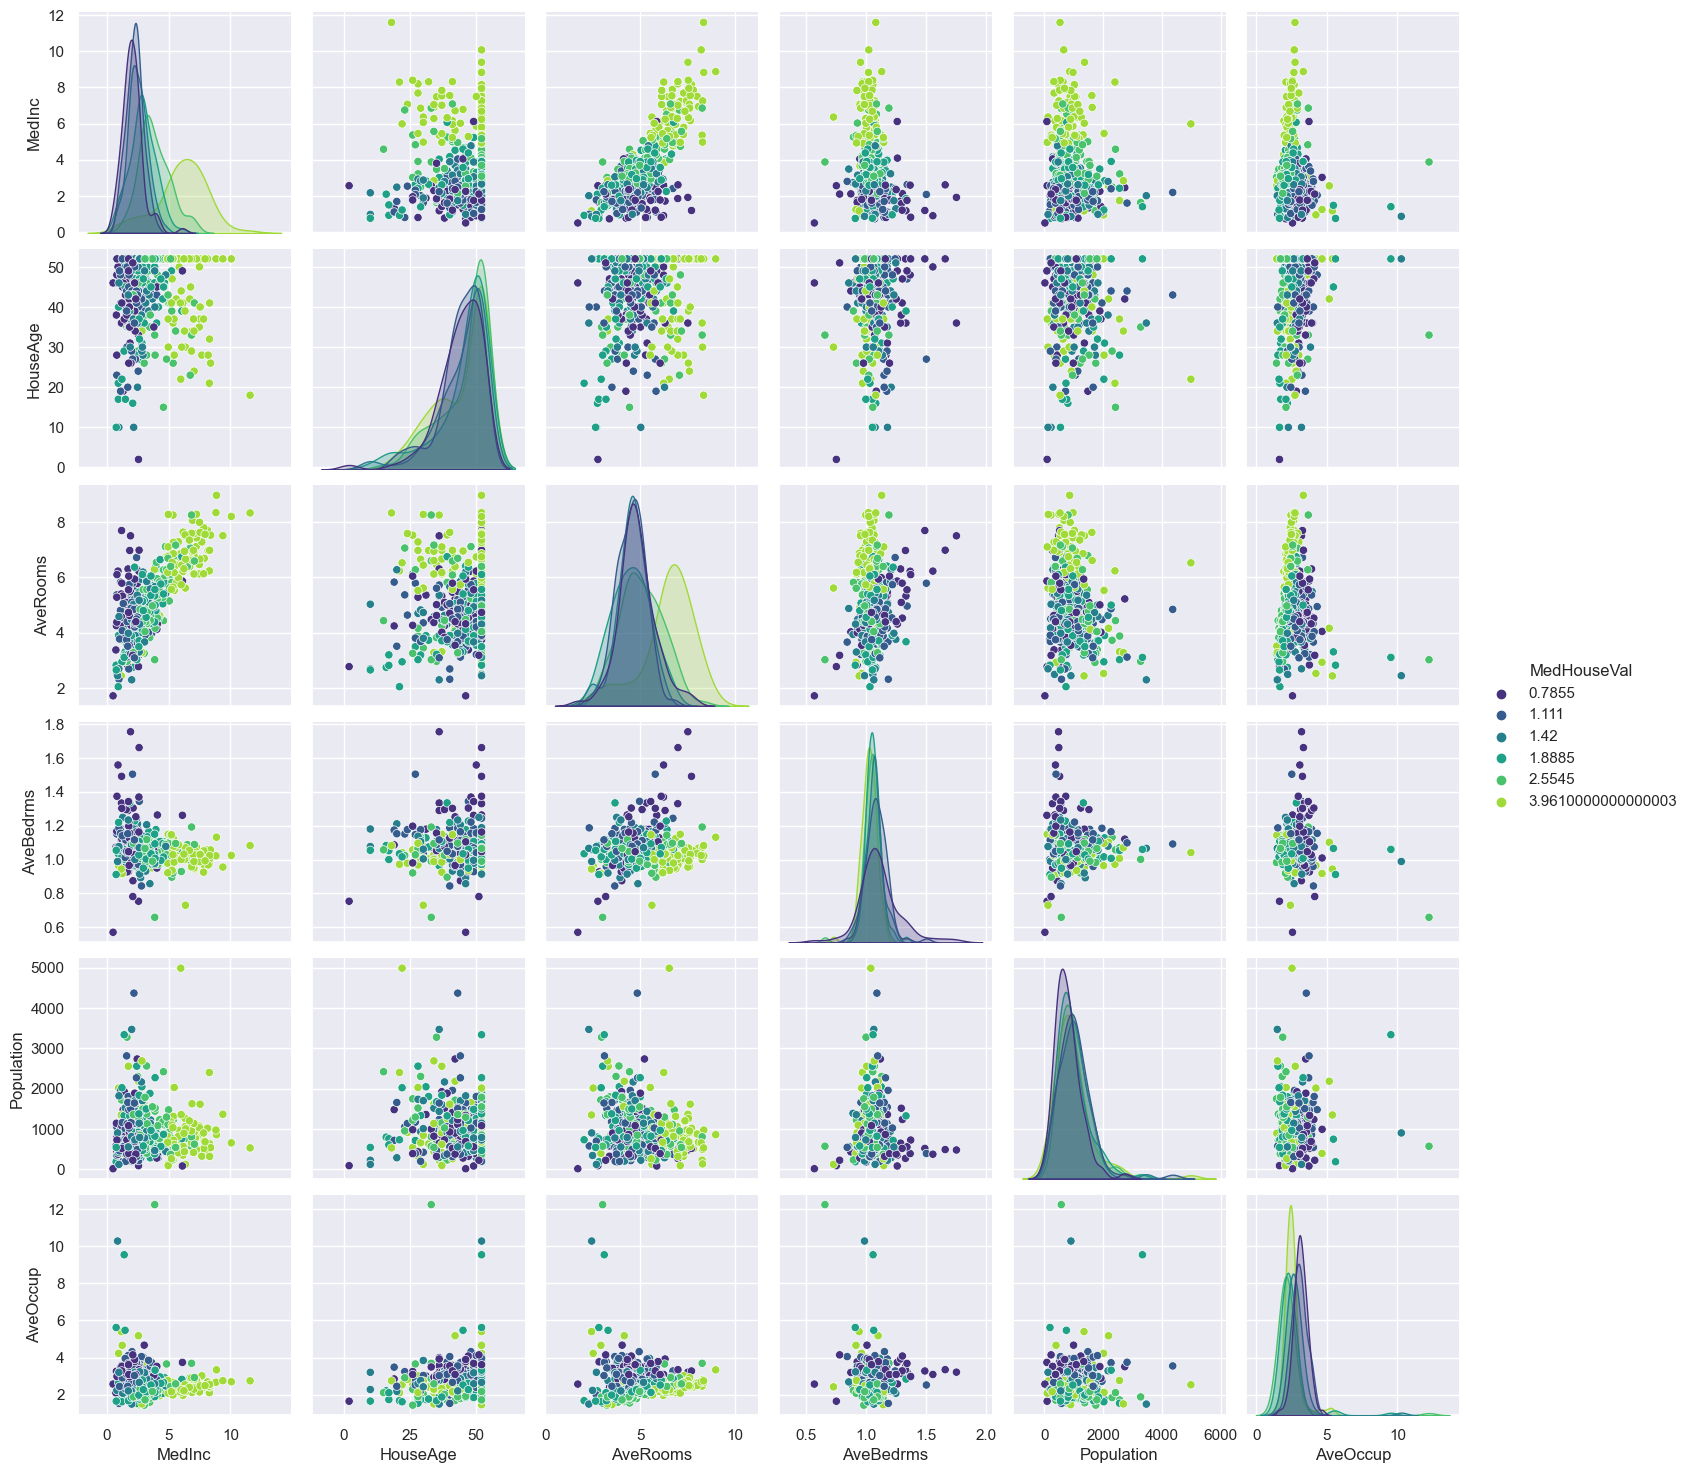

In [5]:
columns_drop = ["Longitude", "Latitude"]
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(data.shape[0]), size=500, replace=False)
subset = data.iloc[indices].drop(columns=columns_drop)
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis");

### Pretraitement
on a appliqué la normalisation aux données d'âge pour mettre toutes les variables sur une échelle comparable.

In [83]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,quantile
0,2.765745,-0.391194,1.613887,-0.412262,-1.136194,-0.167436,1.491096,0.058059,2.660022,4
1,2.752740,-2.585212,1.011109,-0.924579,2.551468,-0.670073,1.046656,0.283094,1.705445,4
2,2.182266,0.815517,2.667556,0.077440,-0.827558,0.110776,0.824436,-0.166976,1.640522,4
3,1.300163,0.815517,0.671104,0.073622,-0.717585,-0.176018,0.824436,-0.392011,1.530964,3
4,0.318281,0.815517,1.046433,0.152762,-0.705168,-0.589300,0.824436,-0.392011,1.540094,3


### Étape 3 : Réduction de Dimension et Visualisation
&emsp;&emsp;Dans la dernière phase de notre analyse, on a appliqué l'algorithme t-SNE (t-distributed Stochastic Neighbor Embedding) pour réduire la dimensionnalité de nos données et les visualiser en 2D et 3D. Cette étape était cruciale pour obtenir des informations plus approfondies sur le jeu de données.

#### &emsp; 3.1 Algorithme t-SNE :

&emsp;&emsp;&emsp;L'algorithme t-SNE est une technique utilisée pour visualiser des données de haute dimension dans des dimensions inférieures. Il utilise une distribution de Student (t-distribution) pour réduire la dimensionnalité en préservant les relations entre les points. En d'autres termes, il groupe les points similaires et les éloigne les uns des autres dans un espace de dimension inférieure.
et voici une visualisation des résultats en 2D :

In [62]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,
            perplexity=50,
            early_exaggeration=20.0,
            init='pca',
            random_state=10,
            verbose=0)


df["quantile"] = pd.qcut(data["MedHouseVal"],
                                [0, .25, .5, .75, .9, 1.],
                                labels=False)


df_tsne = tsne.fit_transform(df.drop(["MedHouseVal"], axis=1))


df_tsne = pd.DataFrame(data={"col0": df_tsne[:, 0],
                             "col1": df_tsne[:, 1]})
df_tsne["value"] = data["MedHouseVal"]
df_tsne["income"] = data["MedInc"]
df_tsne["quantile"] = df["quantile"]


sample_tsne = df_tsne.sample(frac=0.9)


sample_tsne['quantile'] = sample_tsne['quantile'].astype(str)


fig = px.scatter(sample_tsne, x="col0", y="col1", size="income", color="quantile", text=None)
fig.update_layout(width=800, height=600,title="t-SNE 2D Visualization" ,title_x=0.5)
fig.show()


&emsp;On peut voir, grâce à la couleur des bulles attribuée par la catégorie forcée, que l'algorithme parvient en quelque sorte à identifier des couches de prix en utilisant uniquement deux variables. Cependant, il est visible qu'il a encore du mal à former des groupes parfaitement distincts pour la valeur des catégories choisies.

#### 3.2 Visualisation en 3D :

&emsp;Nous avons étendu notre analyse en créant une visualisation en 3D pour obtenir une perspective plus complète sur le jeu de données. Voici un exemple du jeu de données sur les prix immobiliers de Californie dans l'espace tridimensionnel.

In [67]:
tsne3 = TSNE(n_components=3,
             perplexity=30,
             early_exaggeration=20.0,
             init='pca',
             random_state=10)

df_tsne3 = tsne3.fit_transform(df.drop(["MedHouseVal"], axis=1))
df_tsne3 = pd.DataFrame(data={"col0": df_tsne3[:,0],
                              "col1": df_tsne3[:,1],
                              "col2": df_tsne3[:,2]})
df_tsne3["value"] = data["MedHouseVal"]
df_tsne3["income"] = data["MedInc"]
df_tsne3["quantile"] = df["quantile"]

df_tsne3["quantile"] = df_tsne3["quantile"].astype(str)

sample_tsne3 = df_tsne3.sample(frac=1)

fig = px.scatter_3d(sample_tsne3,
                    x="col0", y="col1", z="col2",
                    color="quantile",
                    text=None)
fig.update_layout(width=800, height=600,title="t-SNE 3D Visualization" ,title_x=0.5)

fig.show()


## Conclusion :
&emsp;En conclusion, cette méthodologie nous a permis d'obtenir des informations précieuses sur le jeu de données sur les prix immobiliers de Californie. En commençant par l'analyse des variables simples, on a compris les caractéristiques de base du jeu de données. L'analyse multivariée nous a aidés à découvrir les relations entre les variables, et la réduction de dimension par l'algorithme t-SNE nous a donné une compréhension plus approfondie de sa structure sous-jacente.

&emsp;Cette méthodologie constitue un cadre puissant pour l'analyse exploratoire des données, nous permettant de découvrir des schémas cachés au sein de jeux de données complexes. Si on a des questions ou souhaite discuter davantage de cette analyse, n'hésitez pas à le faire.